# In this chapter we will cover
#### 1: Univariate
#### 2: bivariate

# ******************************************************

# Univariate

In [2]:
# All the libraries used in the file will be here 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Let's generate random data 
np.random.seed(42)
income = np.random.lognormal(mean=3, sigma=0.8, size=1000)

In [12]:
# Descriptive statistics
mean_income = np.mean(income)
median_income = np.median(income)
std_income = np.std(income)
skewness_income = (3*(mean_income - median_income))/std_income

print("Mean Income:", mean_income)
print("Median Income:", median_income)  ## The mean is higher than the median, indicating a right-skewed distribution.
print("Standard Deviation:", std_income)  ## The standard deviation is high, indicating a wide range of values(Measures the spread of the data)
print("Skewness:", skewness_income) ## The skewness is positive, indicating a right-skewed distribution(Positive skewness indicates a long tail on the right).

Mean Income: 28.014155585734073
Median Income: 20.496224321073203
Standard Deviation: 28.095583218776444
Skewness: 0.802752290933394


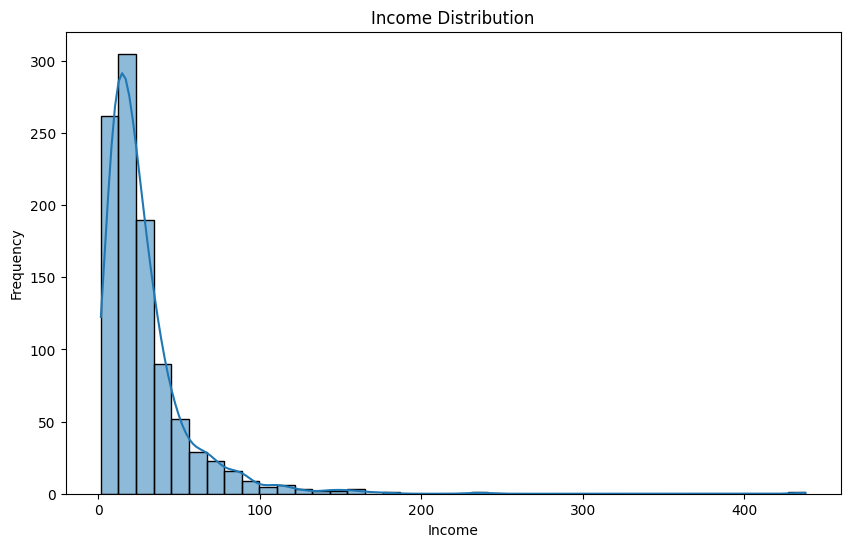

In [15]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(income, kde=True, bins=40)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

<Axes: >

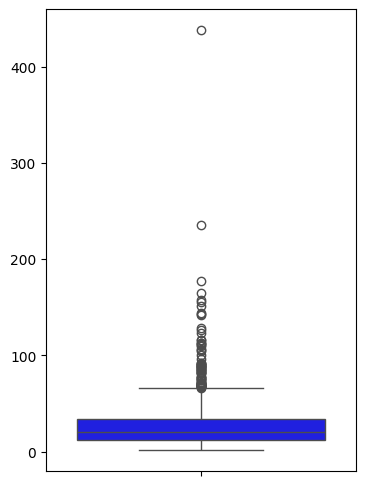

In [21]:
# Box Plot
plt.figure(figsize=(4, 6))
sns.boxplot(income, color='blue')

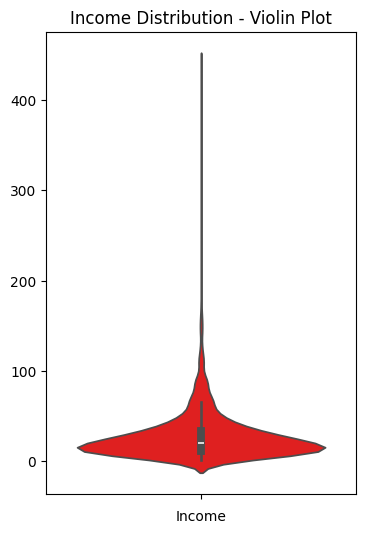

In [22]:
# Violin Plot
plt.figure(figsize=(4, 6))
sns.violinplot(income, color='red')
plt.title("Income Distribution - Violin Plot")
plt.xlabel("Income")
plt.show()

In [23]:
# Another Sample Dataset
data = {'Age': [25, 40, 31, 52, 28, 33, 45, 37, 29, 41]}
df = pd.DataFrame(data)

In [25]:
# Summary Statistics
print(df['Age'].describe())
# Skewness & Kurtosis
print("Skewness:", df['Age'].skew())
print("Kurtosis:", df['Age'].kurt())

count    10.000000
mean     36.100000
std       8.478076
min      25.000000
25%      29.500000
50%      35.000000
75%      40.750000
max      52.000000
Name: Age, dtype: float64
Skewness: 0.5658981416668908
Kurtosis: -0.3771065452866398


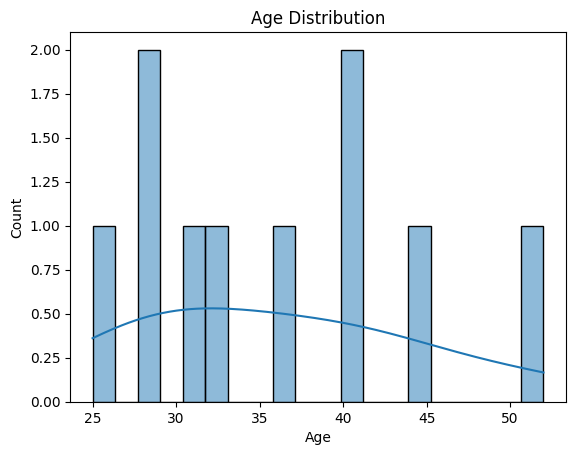

In [27]:
# Histogram
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

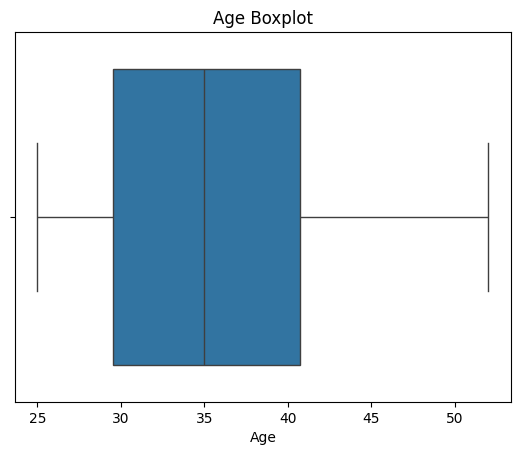

In [28]:
# Boxplot
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot")
plt.show()

In [29]:
# Outlier Detection (Advanced Univariate Analysis)
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Age"] < (Q1 - 1.5*IQR)) | (df["Age"] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Age]
Index: []


## Bivariate Analysis

In [30]:
# Generate synthetic data
np.random.seed(42)
advertising_spend = np.random.normal(100, 20, 1000)
sales = 50 + 2 * advertising_spend + np.random.normal(0, 30, 1000)

Correlation Coefficient: 0.7855767946761959


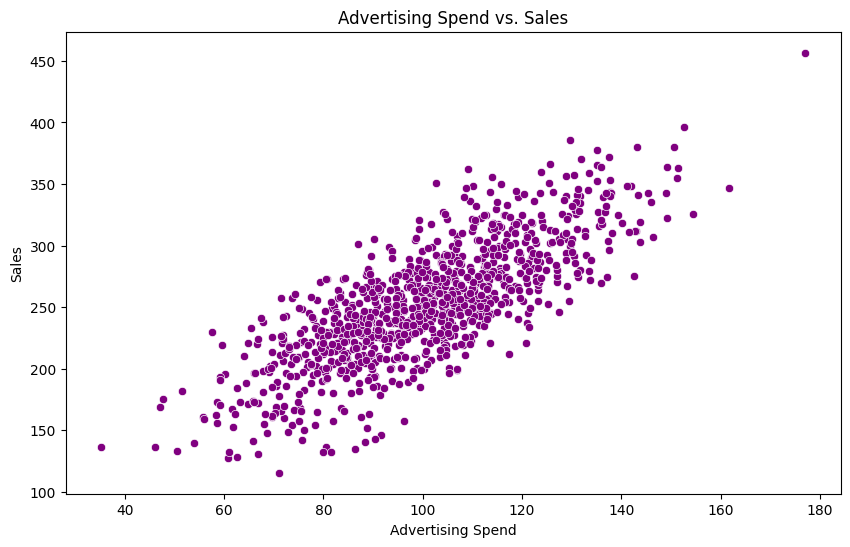

In [36]:
# Correlation coefficient
correlation = np.corrcoef(advertising_spend, sales)[0, 1]
print("Correlation Coefficient:", correlation)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=advertising_spend, y=sales, color='purple')
plt.title("Advertising Spend vs. Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.show()

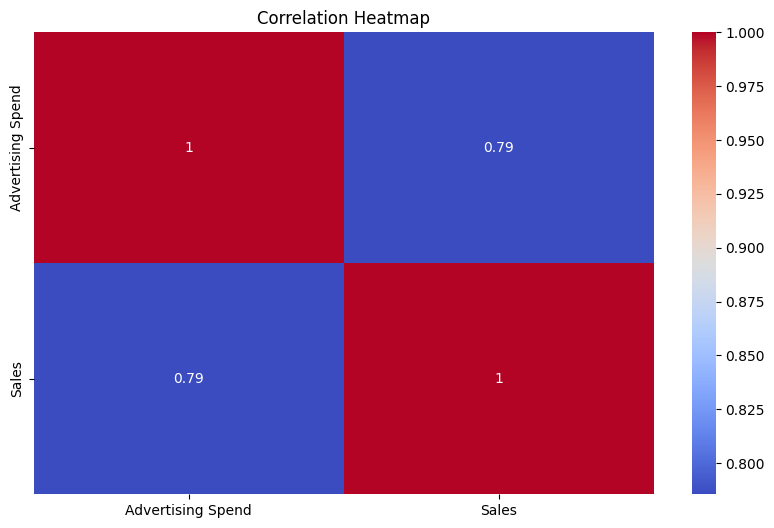

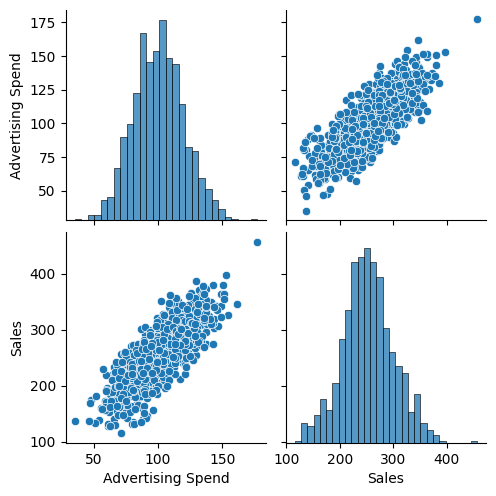

In [ ]:
data = pd.DataFrame({'Advertising Spend': advertising_spend, 'Sales': sales})

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pair Plot
sns.pairplot(data)
plt.show()

In [40]:
# Generate synthetic data for two campaigns
campaign_a_sales = np.random.normal(200, 30, 100)
campaign_b_sales = np.random.normal(220, 35, 100)

In [42]:
# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(campaign_a_sales, campaign_b_sales)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

t-statistic: -5.030513101236268
p-value: 1.093969521145735e-06
Reject the null hypothesis: The means are significantly different.


In [43]:
# Another Example
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
data = pd.read_csv(url)

# Preprocess data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

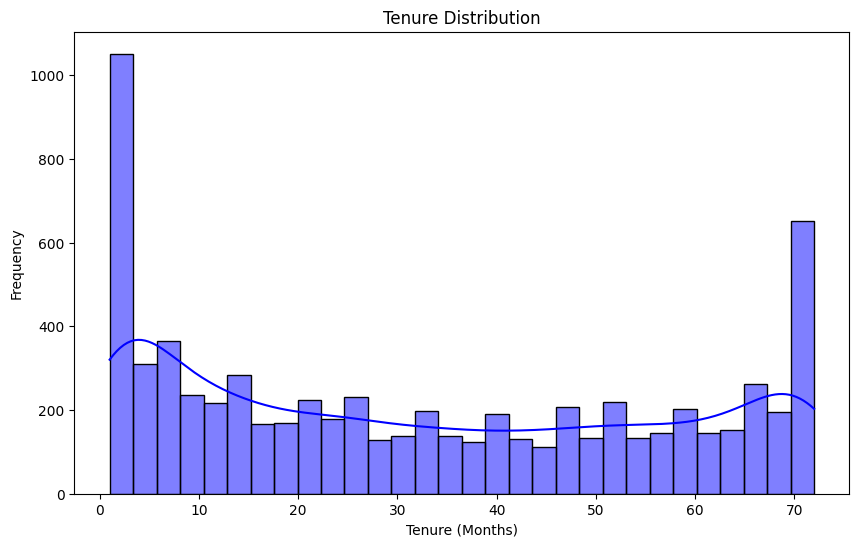

In [45]:
# Analyze tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['tenure'], kde=True, bins=30, color='blue')
plt.title("Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_9956\2584564942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, palette='Set2')


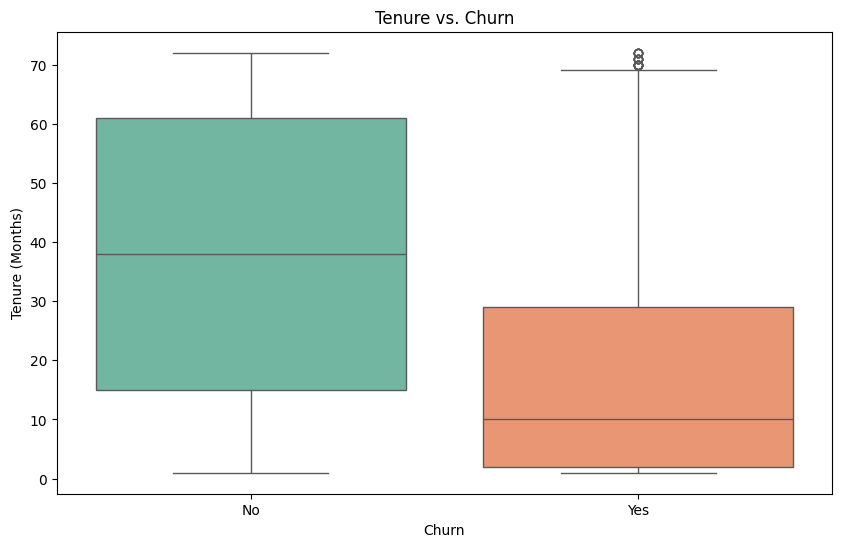

In [46]:
# Analyze relationship between tenure and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data, palette='Set2')
plt.title("Tenure vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

In [47]:
# Perform t-test
churn_yes = data[data['Churn'] == 'Yes']['tenure']
churn_no = data[data['Churn'] == 'No']['tenure']

t_stat, p_value = ttest_ind(churn_yes, churn_no)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

t-statistic: -31.741289063447653
p-value: 9.437650217574845e-207
Reject the null hypothesis: The means are significantly different.
